In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
df=pd.read_csv('Project1.csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#sINCE THERE ARE 312 UNIQUE VALUES OF MODEL it is very hard to use 312 hence we drop that column

In [6]:
df=df.drop(columns=['Model'],axis=1)

In [7]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
clean=df.dropna(axis=0)

In [9]:
clean.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

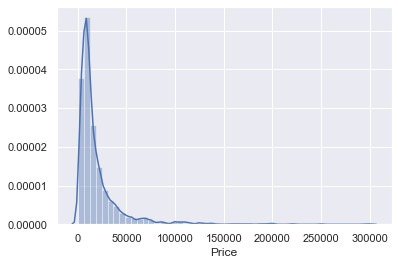

In [10]:
# Checking normality assumption

# price 
sns.distplot(clean['Price'])

In [11]:
#Its exponential so we will try to convert it into normally by taking log transformation
# since mean is 19000 and max is 30000 hence there are outliers

In [ ]:
# DEALING WITH OUTLIERS 

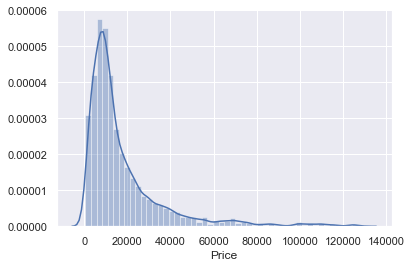

In [36]:
a=clean['Price'].quantile(0.99)
new_df=clean[clean['Price']<a]
sns.distplot(new_df['Price'])

In [14]:
new_df.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


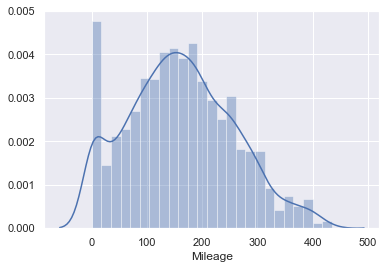

In [37]:
q = new_df['Mileage'].quantile(0.99)
data_2 = new_df[new_df['Mileage']<q]
sns.distplot(data_2['Mileage'])

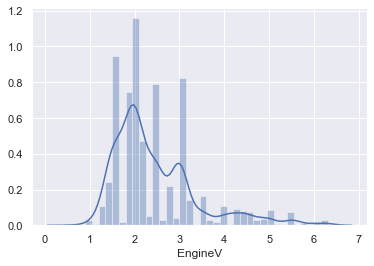

In [39]:


data_3=data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

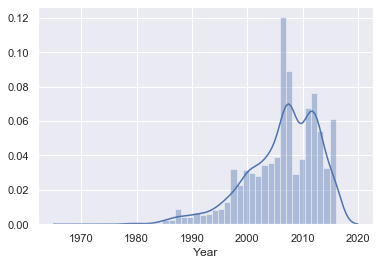

In [40]:
sns.distplot(data_3['Year'])

In [41]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

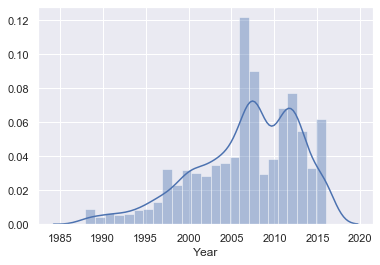

In [42]:
sns.distplot(data_4['Year'])

In [43]:
data_cleaned = data_4.reset_index(drop=True)

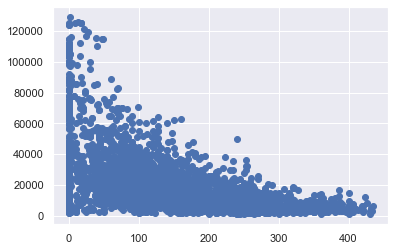

In [50]:
# Checking assumption

plt.scatter(data_cleaned['Mileage'],data_cleaned['Price'])

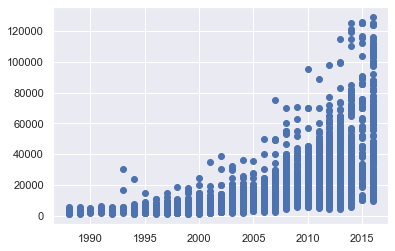

In [49]:
plt.scatter(data_cleaned['Year'],data_cleaned['Price'])

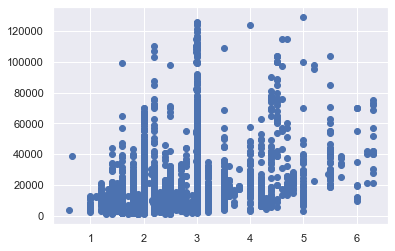

In [48]:
# Checking assumption

plt.scatter(data_cleaned['EngineV'],data_cleaned['Price'])

In [51]:
log_price=np.log(data_cleaned['Price'])

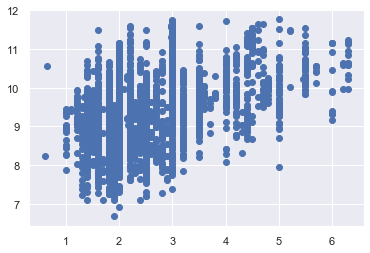

In [53]:

plt.scatter(data_cleaned['EngineV'],log_price)

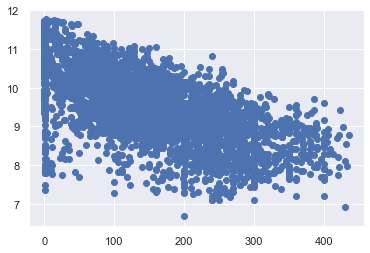

In [54]:
plt.scatter(data_cleaned['Mileage'],log_price)

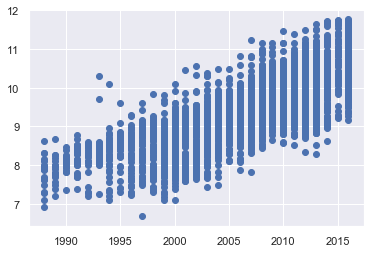

In [55]:
plt.scatter(data_cleaned['Year'],log_price)

In [59]:
# Checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["FEATURES"]=variables.columns

In [60]:
vif

,VIF,FEATURES
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [ ]:
# Since VIF =1 NO MULTI
#VIF=5 ITS OKAY
#VIF>10 DROP IT

In [61]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [62]:
# Create dummy variables for character
dfs=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [63]:
dfs.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [64]:
dfs=dfs.drop(['Price'],axis=1)

In [68]:
dfs['Price']=log_price

In [69]:
dfs.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Price
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,8.342840
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,8.974618
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,9.495519
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10.043249
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,9.814656


In [71]:
dfs.columns.values

array(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes', 'Price'], dtype=object)

In [73]:
targets=dfs['Price']
inputs=dfs.drop(['Price'],axis=1)

In [75]:
# Scale data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
new_inputs=scaler.transform(inputs)

In [76]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_inputs,targets,test_size=0.2,random_state=365)

In [80]:
# from sklearn 
reg=LinearRegression()
reg.fit(x_train,y_train)
y_hat=reg.predict(x_train)

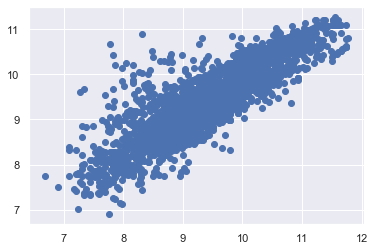

In [81]:
plt.scatter(y_train,y_hat)

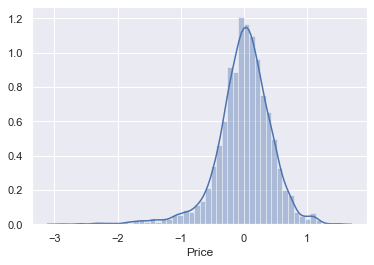

In [82]:
sns.distplot(y_train-y_hat)

In [84]:
# Residual plot
reg.score(x_train,y_train)

0.744996578792662

In [85]:
reg.intercept_

9.415239458021299

In [86]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [92]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Feature'])
reg_summary['weight']=reg.coef_

In [93]:
reg_summary

,Feature,weight
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


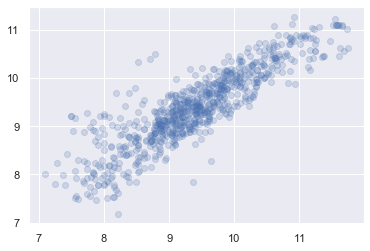

In [94]:
y_hat_test=reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.2)

In [95]:
#It is predicting better for higher price than lower as it more scattered
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['prediction'])
y_test=y_test.reset_index(drop=True)

In [98]:
df_pf['Target']=np.exp(y_test)

In [99]:
df_pf

,prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0


In [101]:
df_pf['residual']=df_pf['Target']-df_pf['prediction']

In [103]:
df_pf['differences']=df_pf['residual']/df_pf['Target']*100

In [104]:
df_pf

,prediction,Target,residual,differences
0,10685.501696,2300.0,-8385.501696,-364.587030
1,3499.255242,2800.0,-699.255242,-24.973402
2,7553.285218,2500.0,-5053.285218,-202.131409
3,7463.963017,6400.0,-1063.963017,-16.624422
4,11353.490075,9150.0,-2203.490075,-24.081859
5,21289.799394,20000.0,-1289.799394,-6.448997
6,20159.189144,38888.0,18728.810856,48.160900
7,20349.617702,16999.0,-3350.617702,-19.710675
8,11581.537864,12500.0,918.462136,7.347697
9,33614.617349,41000.0,7385.382651,18.013128
